<a href="https://colab.research.google.com/github/gcasado0/ciencia_datos/blob/master/U3_Ej4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio N° 4
El dataset wine_quality.xlsx contiene información acerca del puntaje que un panel de enólogos asignó a una serie de 76 vinos de tipo Pinot Noir. Las cualidades evaluadas incluyeron algunas propiedades organolépticas como claridad (clarity), aroma (aroma), cuerpo (body) y sabor (flavor)
y una valoración de la calidad general del vino (quality). Adicionalmente, se recabó información sobre el grado de envejecimiento (aging) de cada uno de los productos evaluados, la cual se encuentra en el
dataset wine_aging.csv.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Mounted at /content/drive


1. Importe ambos datasets y realice cualquier tarea de limpieza y adecuación de los mismos que
considere necesaria para su posterior análisis.

In [3]:
archivo= '/content/drive/MyDrive/TUIA/Fundamentos CD/datasets/unidad3/wine_quality.xlsx'
wine_quality = pd.read_excel(archivo,skiprows=2)
wine_quality

,id,clarity,aroma,body,flavor,quality
0,1,1.0,3.3,2.8,3.1,9;8
1,2,1.0,4.4,4.9,3.5,12;6
2,3,1.0,3.9,5.3,4.8,11;9
3,4,1.0,3.9,2.6,3.1,11;1
4,4,1.0,3.9,2.6,3.1,11;1
...,...,...,...,...,...,...
72,72,0.8,1.9,5.7,2.2,7;5
73,73,0.9,3.3,4.7,5.0,11;1
74,74,1.2,4.6,3.4,6.0,12;1
75,75,0.8,3.8,5.3,5.0,13;2


In [4]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       77 non-null     int64  
 1   clarity  77 non-null     float64
 2   aroma    77 non-null     float64
 3   body     77 non-null     float64
 4   flavor   77 non-null     float64
 5   quality  77 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 3.7+ KB


In [5]:
archivo= '/content/drive/MyDrive/TUIA/Fundamentos CD/datasets/unidad3/wine_aging.csv'
wine_aging = pd.read_csv(archivo, sep=";")
wine_aging

,WINE_id,aging
0,1,crianza
1,2,crianza
2,3,reserva
3,4,crianza
4,5,gran reserva
...,...,...
71,72,crianza
72,73,reserva
73,74,gran reserva
74,75,reserva


In [6]:
wine_aging['aging'].value_counts()

,count
aging,
gran reserva,32
reserva,27
crianza,15
granreserva,1
Reserva,1


In [7]:
# unifico valores de aging porque se escribieron de distintas formas
wine_aging['aging'].replace({'granreserva':'gran reserva', 'Reserva':'reserva'}, inplace=True)

In [8]:
wine_aging['aging'].value_counts()


,count
aging,
gran reserva,33
reserva,28
crianza,15


In [9]:
wine_aging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   WINE_id  76 non-null     int64 
 1   aging    76 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


- hay una diferencia en la cantidad de filas entre ambos datasets. al parecer hay una fila duplicada porque son 76 vinos y wine_quality.xls tiene 77 filas.

In [10]:
wine_quality.drop_duplicates(inplace=True)

In [11]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       76 non-null     int64  
 1   clarity  76 non-null     float64
 2   aroma    76 non-null     float64
 3   body     76 non-null     float64
 4   flavor   76 non-null     float64
 5   quality  76 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.2+ KB


2. ¿Cuál es el tipo de vino (crianza/reserva/gran reserva) que presenta la mayor mediana para el sabor?

In [12]:
# uno los datasets
unificado = wine_quality.merge(wine_aging, left_on='id', right_on='WINE_id')
unificado

,id,clarity,aroma,body,flavor,quality,WINE_id,aging
0,1,1.0,3.3,2.8,3.1,9;8,1,crianza
1,2,1.0,4.4,4.9,3.5,12;6,2,crianza
2,3,1.0,3.9,5.3,4.8,11;9,3,reserva
3,4,1.0,3.9,2.6,3.1,11;1,4,crianza
4,5,1.0,5.6,5.1,5.5,13;3,5,gran reserva
...,...,...,...,...,...,...,...,...
71,72,0.8,1.9,5.7,2.2,7;5,72,crianza
72,73,0.9,3.3,4.7,5.0,11;1,73,reserva
73,74,1.2,4.6,3.4,6.0,12;1,74,gran reserva
74,75,0.8,3.8,5.3,5.0,13;2,75,reserva


In [13]:
unificado.groupby('aging')['flavor'].median()

,flavor
aging,
crianza,3.4
gran reserva,5.8
reserva,4.8


El tipo de vino que presenta la mayor mediana para el sabor es: gran reserva con una mediana de 5.8.

3. Construya la matriz de covariancia de las distintas variables cuantitativas que componen el dataset y comente qué tipo de información le aporta acerca de la relación entre los distintos pares de variables cuantitativas del dataset.

In [14]:
wine_quality[['clarity','aroma','body','flavor']].cov()

,clarity,aroma,body,flavor
clarity,0.016272,0.008600,-0.017854,0.025598
aroma,0.008600,1.361200,0.231933,0.479267
body,-0.017854,0.231933,0.694784,0.143374
flavor,0.025598,0.479267,0.143374,1.261423


4. Construya la matriz de correlación de las distintas variables cuantitativas que componen el dataset. En base al mismo, identifique la/s variable/s que se encuentran más fuertemente correlacionadas e informe e interprete la medida de asociación lineal correspondiente

In [15]:
wine_quality[['clarity','aroma','body','flavor']].corr(method='pearson')

,clarity,aroma,body,flavor
clarity,1.000000,0.057785,-0.167919,0.178674
aroma,0.057785,1.000000,0.238494,0.365751
body,-0.167919,0.238494,1.000000,0.153149
flavor,0.178674,0.365751,0.153149,1.000000


In [16]:
matriz=wine_quality[['clarity','aroma','body','flavor']].corr(method='spearman')

5. Elija el par de variables que identificó en el ítem anterior como aquellas que se encuentran más fuertemente correlacionadas linealmente y realice un gráfico que le permita visualizar la relación general que existe entre las mismas.

<Axes: >

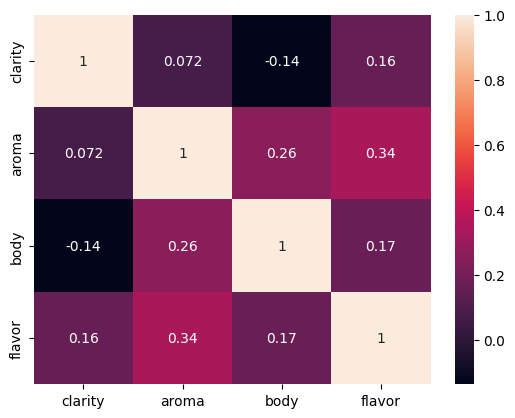

In [17]:
# Construimos el heatmap
sns.heatmap(matriz, annot = True)

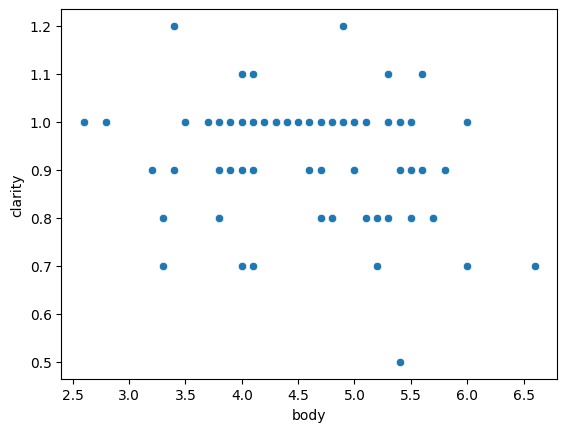

In [18]:
# los que menos correlacion tienen
sns.scatterplot(x = 'body', y = 'clarity', data = wine_quality);

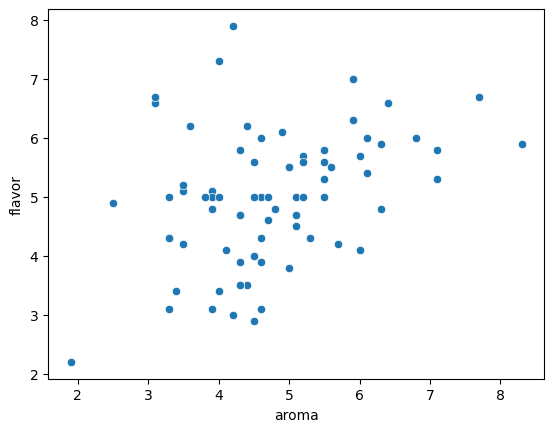

In [19]:
# los que mas correlacion tienen
sns.scatterplot(x = 'aroma', y = 'flavor', data = wine_quality);